<a href="https://colab.research.google.com/github/amj128/Johnson_PHYA201/blob/main/160_HW2_AlyssaJohnson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
import pandas as pd
import operator
import pickle
import statistics
import sys 
import seaborn as sns

from astropy.table import QTable, Table, Column
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.table import Table
from astropy.io import fits
from astropy.coordinates import Galactic
from astropy.coordinates import SkyCoord
from astropy import units as u
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
from pylab import *
from astropy.convolution import convolve, Gaussian2DKernel
from astropy.cosmology import Planck15
from tabulate import tabulate
from operator import itemgetter
from sklearn.model_selection import train_test_split
import scipy

# <span style="color:blue">PROBLEM 1A</span>

The aim of this problem is to show that the Rayleigh-Jeans approximation can be derived from the Planck function, as seen below:

\begin{equation}
    \text{(3.22)} B_\lambda(T)=\frac{2 h c^2 / \lambda^5}{e^{h c / \lambda k T}-1}
\end{equation}

To solve, do an expansion around $e^x \approx 1+x$.<br>

Looking at denominator in Planck function...<br> 

When we look at $e^{h c / \lambda k T}-1$ <br>

Use $\lambda \gg h c / k T$ (wavelength is large) this term becomes small <br>

- $e^n-1 \approx n \rightarrow e^{h c / \lambda k T}-1=h c / \lambda k T$
(for small values of $n$ )

- Planck function: $B_\lambda(T)=\frac{2 h c^2 / \lambda^5}{e^{h c / \lambda k T}-1}$


\begin{aligned}
& B_\lambda(T)=\frac{2 h c^2 / \lambda^{5}}{h c / \lambda k T}\\ \\
& B_\lambda(T)=\frac{2 c k T}{\lambda^4}
\end{aligned}


# <span style="color:blue">PROBLEM 1B</span>

From the book (p.72)  we have this equation,that describes a curve at short wavelengths:

\begin{equation}
    \text{(3.21) } B_\lambda(T) \simeq a \lambda^{-5} e^{-b / \lambda T}
\end{equation}

Now for short wavelengths let's look at the denominator again to see what happens when $\lambda \ll h c / k T$.<br>

Using $B_\lambda(T)=\frac{2 h c^2 / \lambda^5}{e^{h c / \lambda k T}-1}$ <br>

Meaning $e^{h c / k T} \gg 1$
-1 term can be removed <br>

Now, $B_\lambda(T)=\frac{2 h c^2 / \lambda^5}{e^{h c / \lambda k T}-1}=\frac{2 h c^2}{\lambda^5} \cdot e^{-h c / \lambda k T}$ <br>

$B_\lambda(T)=\alpha \lambda^{-5} e^{-b / \lambda T}$ <br>

where $\alpha=2 h c^2$ and $b=h c / k \equiv$ const.

$$
B_\lambda(T) \simeq a \lambda^{-5} e^{-b / \lambda T}
$$

(valid only if $\lambda$ is short)

# <span style="color:blue">PROBLEM 3A</span>

Kepler's Third Law
$$
\begin{aligned}
& a=0.10'' \\
& a=\theta \text { in arcseconds } \times \text { dist. in pc } \\
& a=0.10''\times 8 \text{ pc} \\
& a=0.8 \text{ AU}=1.2 \times 10^{11} \mathrm{~m} \\
& M=\frac{4 \pi^2 a^3}{G P^2} \\
& M=\frac{4 \pi^2 (1.2\times10^{11} \text{ m})^3}{\left(6.674 \times 10^{-11} \mathrm{~Nm^{2} kg^{-1}}\right)\left(3.6 \times 10^8 \text{ sec}\right)^2}\\
&M = \text{kg} 
\end{aligned}
$$


In [ ]:
G = 6.674*10**-11
a = 0.10 * 8 * (1.196783*(10**11)) #arcseconds x parsecs = AU or METERS
P = 11.9 * (3.15*(10**7))
Msol = 2 * 10**30

def Kepler_third(sma,per):
  M = (4*np.pi*(sma**3))/(G*(per)**2)
  Ms = M / Msol
  return print(M)

mass = Kepler_third(a,P)
mass = 1.1760474020676776e+27

1.1760474020676776e+27
1.1760474020676776e+27


# <span style="color:blue">PROBLEM 3B</span>


\begin{aligned}
& r_p=a(1-e) \\
& r_p=\left(3.08 \times 10^{17}\right)(1-0.68) \\
& r_p=3.06 \times 10^{10} \mathrm{~m} \\
& v^2=G\left(M_1+M_2\right)\left(\frac{2}{r}-\frac{1}{a}\right)
\end{aligned}

The mass of the star is negligble compared to to the mass of the black hole.

\begin{aligned}
& V^2=G(M)\left(\frac{2}{r}-\frac{1}{a}\right) \\
& V=\sqrt{\left(6.674 \times 10^{-11}\right)\left(1.17 \times 10^{17}\right)\left(\frac{2}{\left(3.06 \times 10^{10}\right.}-\frac{1}{1.2 \times 10^8}\right)} \\
& V= \text{ ms}
\end{aligned}




In [ ]:
ec = 0.68 #eccentricity
Rs = 6.95 * 10**7

def rad (sma,ecc):
  rp = sma*(1-ecc)
  rp_sol = rp/Rs #km
  return (print(rp))

radius = rad(a,ec)
radius = 30637644799.999996


30637644799.999996


In [ ]:
def velo(M,r,a):
  ve = (G*M* ((2/r)-(1/a))  )
  return print(ve)

speed = velo(mass,radius,a)
speed = 4303927.372103832

4303927.372103832


# <span style="color:blue">PROBLEM 3C</span>

Schwarschild Radius (Eqn. 17.27):

$$
\begin{aligned}
R_S & =\frac{2 G M}{C^2}  \\
R_S & =\frac{2\left(6.674 \times 10^{-11}\right)\left(1.17 \times 10^{27}\right)}{\left(3 \times 10^8\right)^2} \\
R_S & =\mathrm{m}
\end{aligned}
$$

With S0-102 orbiting the black hole it gets as close as... m to the black hole.


# <span style="color:blue">PROBLEM 4A</span>

$$
\begin{aligned}
& \lambda_{\text {max }}=\frac{0.0029 \mathrm{mK}}{T} \\ \\
& T_{\text {star }}=\frac{0.0029 \mathrm{mK}}{\lambda_{\text {max }}} \\ \\
& T_{\text {star } 1}=\frac{0.0029}{3900 \times 10^{-10}} \\ \\
& T_{\text {star } 1}= 7435 \mathrm{~K} \\ \\
& T_{\text {star } 2}=\frac{0.0029}{6000 \times 10^{-10}} \\ \\
& T_{\text {star } 2}= 4833 \mathrm{~K}
\end{aligned}
$$

In [ ]:
def wien(T):
    'Wiens displacement law'
    'Returns peak wavelength in m'
    wav = 0.0029/T 
    return print(str('This is the peak wavelength: ')+ str(wav))

def wien_temp(wav):
    'Wiens displacement law'
    'Returns temperature in K'
    T = 0.0029/wav
    return print(T)

In [ ]:
ang_conv = 10**-10
s1_f = 3900 * ang_conv
s2_f = 6000 * ang_conv

wien_temp(s1_f)

wien_temp(s2_f)

7435.897435897435
4833.333333333333


# <span style="color:blue">PROBLEM 4B</span>

# <span style="color:blue">PROBLEM 4C</span>

# <span style="color:blue">PROBLEM 5A</span>

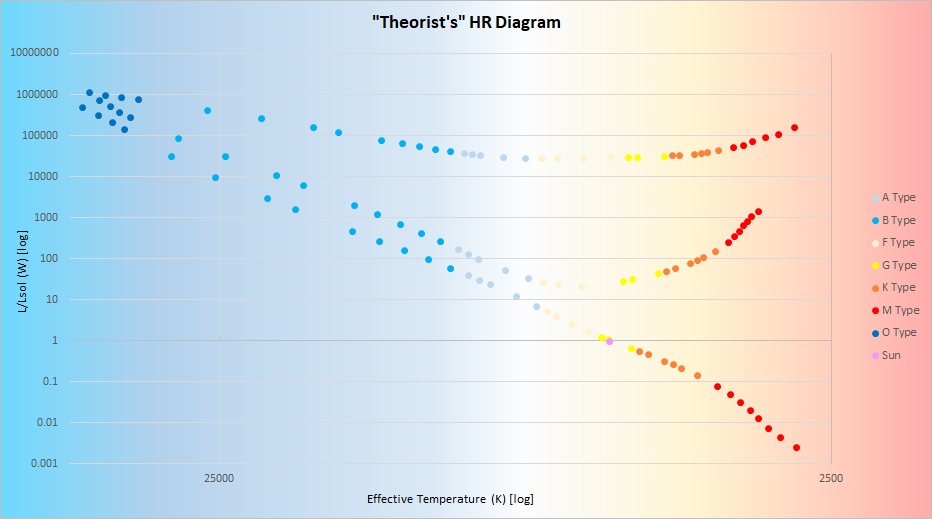

# <span style="color:blue">PROBLEM 5B</span>

Example: 05 type star
$$
\begin{aligned}
& L=499000 L_0 T=42000 \\
& L=A \sigma T^4\left(\text { units }: W / \mathrm{m}^2 \mathrm{~K}^4\right) \\
& L=4 \pi R^2 \sigma T^4 \\
& \downarrow \\
& R^2=\frac{L}{4 \pi \sigma T^4} \\
& \downarrow \\
& R=\sqrt{\frac{L}{4 \pi \sigma T^4}} \\
& R=\sqrt{\frac{(499000)\left(3.8 \times 10^{26} \mathrm{~W}\right)}{4 \pi\left(5.67 \times 10^{\left.-8 \mathrm{~W} / \mathrm{m}^2 \mathrm{~K}^4\right)(42000)^4}\right.}}
\end{aligned}
$$

# <span style="color:blue">PROBLEM 5C</span>

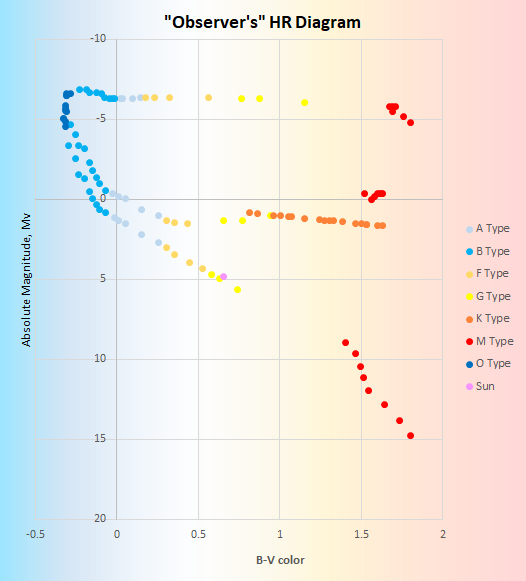